In [1]:
!pip3 install scipy


[]


In [9]:
import numpy as np
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../etl/')

import Graphe as gr
from scipy.integrate import solve_ivp, odeint

class SIRModel():
    """
    Blabla sur SIR model
    
    TODO : equations

    """
    def __init__(self, beta=0.1, gamma=0.3, run_default=False):
        # self.beta_0 = beta_init
        # self.gamma_0 = gamma_init
        self.beta_ = None
        self.gamma_ = None
        if run_default:
            self.beta_ = beta
            self.gamma_ = gamma

    def fit(self, X, y):
        return self

    """
        S = those susceptible but not yet infected with the disease
        I = the number of infectious individuals
        R = those individuals who have recovered from the disease and now have immunity to it
    """

    def predict(self, init_population, init_infected, day_number, init_recovered=0):
        t = np.linspace(0, day_number, day_number)
        SIR = (init_population - init_infected - init_recovered, init_infected, init_recovered)
        res = odeint(self.deriv, SIR, t, args=(init_population, self.beta_, self.gamma_))
        return res.T

    def deriv(self, SIR, t, N, beta, gamma):
        S, I, R = SIR
        dSdt = -beta * S * I / N
        dIdt = beta * S * I / N - gamma * I
        dRdt = gamma * I
        return dSdt, dIdt, dRdt


if __name__ == '__main__':
    sir_model = SIRModel(run_default=True)
    print("salut")
    print(sir_model.predict(1000, 1, 0, 160))
    



salut
[]


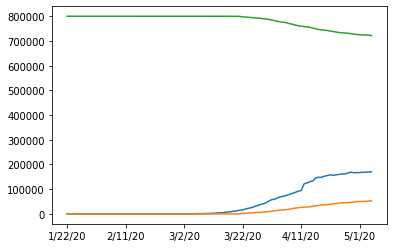

In [10]:
tot=gr.get_total()
con=gr.get_confirm()
recover=gr.get_recover()
deaths=gr.get_deaths()
gr.Graphe(confirm=con,total=tot,recover=recover,deaths=deaths,country="France")




65129731

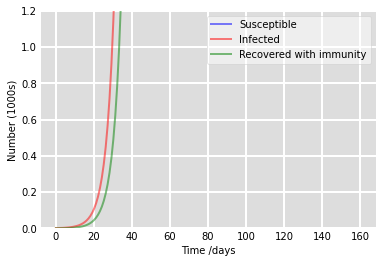

In [14]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = gr.total_by_country(tot,"France")
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 1/3, 1./10 
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()
